In [11]:
# Libraries import
import pandas as pd, numpy as np, missingno as mno

In [12]:
# Read the dataset
df = pd.read_csv('dataset_brief_assur_aimant.csv')

In [13]:
# Check for missing values
missing = df.isnull().sum()
print(missing)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [14]:
# Check for duplicates
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [15]:
#calculate descriptive statistics for the dataset
descriptive_stats = df.describe()

#check for outliers in the numerical variables
for col in df.select_dtypes(include=['int64','float64']).columns:
    q1 = descriptive_stats.loc['25%', col]
    q3 = descriptive_stats.loc['75%', col]
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    
    if len(outlier_values) > 0:
        print("Column "+col+" has outliers")
        print("Outlier values are:")
        print(df.iloc[outlier_values])

Column bmi has outliers
Outlier values are:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270
Column charges has outliers
Outlier values are:
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  nor

<AxesSubplot: >

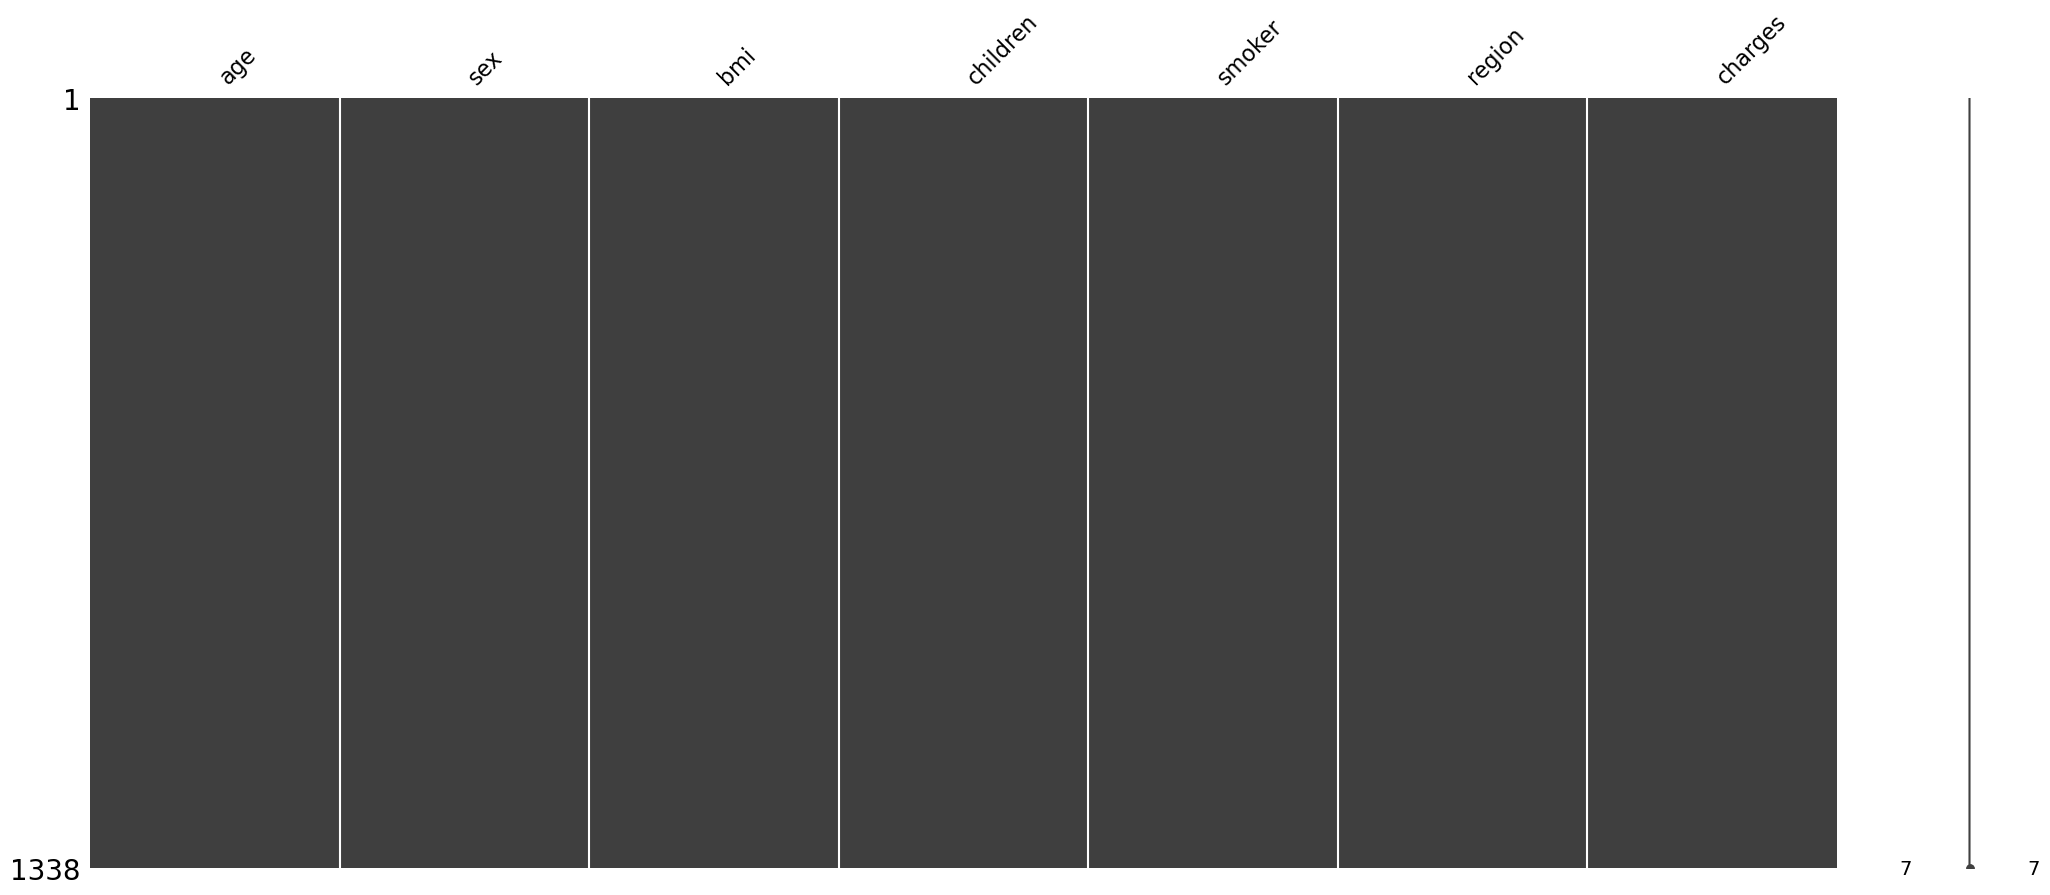

In [16]:
mno.matrix(df)

In [17]:
print(df.nunique())

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64
